In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

/Users/icchy/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(tf.__version__)

1.12.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
type(fashion_mnist)

module

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
mnist = [train_images, train_labels, test_images, test_labels]
for i in mnist:
    print(type(i))
    print(len(i))

<class 'numpy.ndarray'>
60000
<class 'numpy.ndarray'>
60000
<class 'numpy.ndarray'>
10000
<class 'numpy.ndarray'>
10000


In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [8]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [10]:
train_images.shape

(60000, 28, 28)

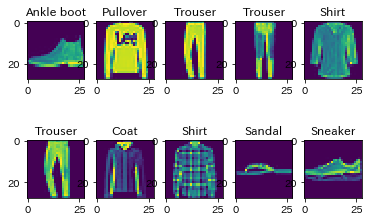

In [11]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title(class_names[test_labels[i]])
    plt.imshow(test_images[i])

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [13]:
train_images[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512 ,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
train_labels_hot = np_utils.to_categorical(train_labels)
test_labels_hot = np_utils.to_categorical(test_labels)
model.fit(train_images, train_labels_hot, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2926 - acc: 0.8927
Epoch 2/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2827 - acc: 0.8939
Epoch 3/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2743 - acc: 0.8983
Epoch 4/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2628 - acc: 0.9023
Epoch 5/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2548 - acc: 0.9052


In [20]:
model.evaluate(test_images, test_labels_hot)

10000/10000 [==============================] - 0s 44us/step


[0.32024483680725097, 0.885]

In [21]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512 ,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax'),
])

In [22]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model2.fit(train_images, train_labels, batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.5280 - acc: 0.8164
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3873 - acc: 0.8606
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3486 - acc: 0.8735
Epoch 4/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.3249 - acc: 0.8809
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3085 - acc: 0.8869


In [24]:
model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 44us/step


[0.3549554923057556, 0.872]

In [25]:
model2.fit(train_images, train_labels, batch_size=128, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2956 - acc: 0.8902
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2830 - acc: 0.8962
Epoch 3/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2738 - acc: 0.8990
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.2658 - acc: 0.9017
Epoch 5/10
60000/60000 [==============================] - 3s 52us/step - loss: 0.2614 - acc: 0.9029
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.2497 - acc: 0.9071
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2408 - acc: 0.9098
Epoch 8/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2373 - acc: 0.9097
Epoch 9/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2304 - acc: 0.9140
Epoch 10/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.2256 - acc: 0.9154

In [26]:
model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 39us/step


[0.3063145012617111, 0.892]

In [27]:
model2.fit(train_images, train_labels, batch_size=128, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2169 - acc: 0.9170
Epoch 2/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2140 - acc: 0.9188
Epoch 3/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2096 - acc: 0.9206
Epoch 4/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.2038 - acc: 0.9228
Epoch 5/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.1991 - acc: 0.9242
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1972 - acc: 0.9248
Epoch 7/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1897 - acc: 0.9280
Epoch 8/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1885 - acc: 0.9278
Epoch 9/20
60000/60000 [==============================] - 3s 49us/step - loss: 0.1860 - acc: 0.9300
Epoch 10/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.1777 - acc: 0.9335

In [28]:
model2.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 42us/step


[0.3390356802344322, 0.8991]

In [33]:
print(test_labels[:10])
model.predict(test_images[:10])

[9 2 1 1 6 1 4 6 5 7]


array([[2.4853053e-08, 2.1874252e-08, 2.5858816e-08, 1.2120129e-08,
        1.8740658e-07, 4.8642848e-03, 1.0033505e-07, 4.9594105e-03,
        6.2423186e-07, 9.9017531e-01],
       [2.2618273e-04, 4.6800172e-12, 9.9670154e-01, 1.2055533e-08,
        1.2864401e-03, 1.1096271e-12, 1.7858212e-03, 1.0005435e-11,
        1.3104341e-08, 1.6403835e-11],
       [9.3473318e-10, 1.0000000e+00, 7.2706577e-11, 2.1997759e-10,
        4.6250587e-10, 5.7729097e-14, 9.1731223e-12, 6.8982029e-19,
        2.3710748e-13, 6.1494539e-17],
       [3.7816887e-09, 9.9999988e-01, 3.2946688e-09, 1.2688375e-07,
        1.1267019e-08, 3.0384068e-12, 5.9523347e-10, 6.5154944e-16,
        1.1938879e-12, 8.1354411e-14],
       [1.4864765e-01, 1.0430396e-06, 1.6854795e-02, 1.5956688e-03,
        1.8339449e-03, 8.0094014e-06, 8.3095831e-01, 3.7452094e-06,
        8.4103878e-05, 1.2709151e-05],
       [8.9589042e-07, 9.9999881e-01, 7.8523172e-08, 1.9374296e-08,
        1.5708866e-07, 4.3064521e-11, 4.5268635e-08, 2.24